In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=42)

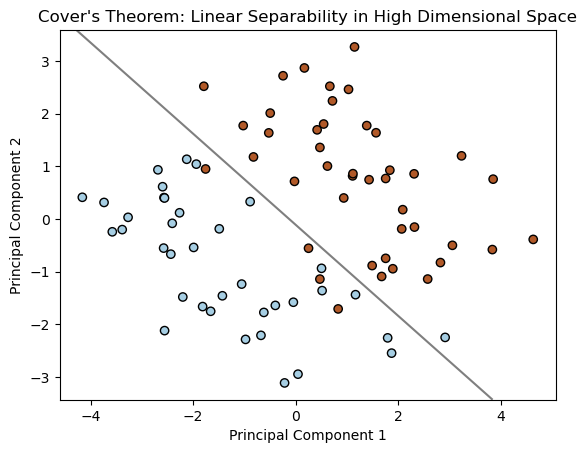

Accuracy on the test set: 0.9


In [2]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.title('Cover\'s Theorem: Linear Separability in High Dimensional Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

plt.show()

X_test_pca = pca.transform(X_test)
predictions = svm_classifier.predict(X_test_pca)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on the test set: {accuracy}")